# Spam or Ham: Basic Naive Bayes Email Spam Filter

My aim in this project is use Bayes formula to construct a spam filter, which will predict based off of raw text whether a message is "spam" or "ham (non-spam)". The problem is one of binary classification in which my model will be appraised as accurate if it properly predicts the right label. The main accuracy metric, therefore, will be the number of correct labels divided by the number of overall guesses.  

The dataset for this project is from the Data Science/Machine Learning competition website <a href="https://www.kaggle.com/uciml/sms-spam-collection-dataset" target="#">Kaggle</a>. The dataset is comprised of two columns, one for the message text and one for the label ("ham" or "spam"). There are 5169 rows of unique data.

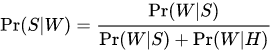

What is the probability (Pr) that a message is spam (S) given word (W)? This question is what <a href="https://en.wikipedia.org/wiki/Naive_Bayes_spam_filtering" target="#">Bayes' theorem</a> attempts to calculate. Divide the probability of a word being in a spam message by that same probability added to the probability of a word being in a ham message -- this is a simplified form of Bayes' theorem that excludes any prior assumptions regarding the probability of a message being ham or spam. To be more specific, in all of the spam messages, count the number of times a given word occurs and divide that by the number of overall words in the spam messages -- this constitutes the probability in the numerator. This probability is then added to the same calculation applied to the word's frequency in ham messages -- the denominator. 

Since each message contains multiple words, probabilities for each word given spam are multiplied, then the resulting product is divided by the same product added to the product of all the multiplied words given ham. The "naive" in Naive Bayes owes to the fact that multiplying probabilities together assumes a statistical independence these probabilities don't have -- and why's that? Because words aren't randomly assembled into sentences. Certain words occur frequently with others, but for the sake of simplicity, we're going to ignore this fact. Ignoring the patterns in language isn't foolhardy or "naive" in the pejorative sense, as model builders much more sophisticated than myself have proven time and again that Naive Bayes works really well for problems like spam filtering.

While there are prebuilt Bayesian models provided by many popular Machine Learning libraries, for the sake of learning, I'll be building my own from scratch, only using libraries to preprocess and prepare the data.

In [1]:
#main data science libraries
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, cross_validate
import re

In [2]:
#read CSV file into a dataframe
data = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [3]:
#examine top 5 rows of data
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#the additional columns (Unnamed:2 through Unnamed: 4) have some text data,
#but are primarily composed of null values and will be dropped.
data = data[['v1','v2']]

In [5]:
#rename columns for easier reference
data.columns = ['label','text']

In [6]:
#create list of all the unique words that occur in the text col
unique_words = []

for i,row in data.iterrows():
    for word in row['text'].split(' '):
        word = re.sub(r'\W+', '', word)
        if word in unique_words:
            pass
        else:
            unique_words.append(word)
            
total_num_of_words = len(unique_words)

print("There are {} in the dataframe after removing non-alphanumeric characters.".format(total_num_of_words))

There are 11629 in the dataframe after removing non-alphanumeric characters.


In [7]:
#create empty dataframe to store word counts
wordcount_df = pd.DataFrame(0, index=np.arange(len(data)), columns=unique_words)

#count occurence of words in each message and increment the corresponding column
for i, row in data.iterrows():
    for word in row['text'].split(' '):
        word = re.sub(r'\W+', '', word)
        wordcount_df.iloc[i,unique_words.index(word)]+=1

wordcount_df.head()

,Go,until,jurong,point,crazy,Available,only,in,bugis,n,...,BORING,salesman,REMINDER,å750,087187272008,NOW1,Pity,Soany,suggestions,bitching
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#combine word count dataframe with labels from original dataframe
merged = pd.concat([wordcount_df,data],axis=1)

In [9]:
#examine first five rows of merged dataframe
merged.head()

,Go,until,jurong,point,crazy,Available,only,in,bugis,n,...,REMINDER,å750,087187272008,NOW1,Pity,Soany,suggestions,bitching,label,text
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,Ok lar... Joking wif u oni...
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,U dun say so early hor... U c already then say...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#create Class object to read in training dataset, calculate conditional probabilities
#and create model to generate predictions for test dataset
class PredictBayes:
    def __init__(self):
        self.priors = {}
        self.conditionals = {}
        self.predictions = []
        self.prob_product = {}
        
    def fit(self,train,target):
        self.target = target
        self.train = train
        self.labels = set(self.train[self.target].values)

        for label in self.labels:
            self.priors[label] = self.train[self.train[target]==label].shape[0]/self.train.shape[0]
            data = self.train[self.train[self.target]==label]
            self.conditionals[label] = data.drop(self.target,axis=1).sum()/data.drop(self.target,axis=1).sum().sum()
            
    def predict(self,test,features):
        self.test = test
        self.features = features
        for label in self.labels:
            product_list = []
            for word in self.features.split(' '):
                word = re.sub(r'\W+', '', word)
                product_list.append(self.conditionals[label][word])
            self.prob_product[label] = product_list

In [11]:
testing = PredictBayes()

In [12]:
#split data into training and test sets -- 80% and 20% of the data, respetively
train, test = train_test_split(merged,test_size=.2,random_state=15)

In [14]:
testing.fit(train.drop('text',axis=1),"label")